## Explortary Analysis about female programmers

### Business understanding:
People may consider it is hard for women to step into the tech field. But how about women already in this industry? 
Will they have advantages than male programmers? 

This analysis try to answer it by exploring four questions below:
##### 1. Do the salary of female programmers overtake earning of male programmers?
##### 2. Can female programmers get hired with a lower degree?
##### 3. Do female programmers enjoy their job as a programmer?
##### 4. Do female programmers enjoy coding as a hobby?

In [2]:
#import libraries and basic setting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu,chi2_contingency
%matplotlib inline
pd.set_option('max_colwidth', None)
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
sns.set(style="ticks", palette="pastel")

In [8]:
#read raw data
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

### 1. Do salary of female programmers overtake earning of male programmerdevelopers?

#### Data understanding

In [5]:
#check values in cloumn Gender
df.Gender.value_counts(normalize=True)

Male                                                       0.901332
Female                                                     0.074186
Other                                                      0.006420
Male; Other                                                0.004879
Gender non-conforming                                      0.004565
Male; Gender non-conforming                                0.001855
Female; Transgender                                        0.001598
Transgender                                                0.001569
Female; Gender non-conforming                              0.000827
Transgender; Gender non-conforming                         0.000428
Male; Female; Transgender; Gender non-conforming; Other    0.000428
Male; Female                                               0.000428
Male; Transgender                                          0.000314
Female; Transgender; Gender non-conforming                 0.000228
Male; Female; Transgender; Gender non-conforming

In [258]:
#check missing values in Gender. We need to drop them to avoid bias caused by imputing. 
df.Gender.isnull().sum()

16345

In [7]:
#Statistics Summary for Salary and Expected Salary
df.groupby(df.Gender)[['Salary','ExpectedSalary']].describe()

Salary  \
                                                           count   
Gender                                                             
Female                                                     819.0   
Female; Gender non-conforming                               13.0   
Female; Gender non-conforming; Other                         0.0   
Female; Other                                                0.0   
Female; Transgender                                         19.0   
Female; Transgender; Gender non-conforming                   3.0   
Female; Transgender; Gender non-conforming; Other            0.0   
Female; Transgender; Other                                   1.0   
Gender non-conforming                                       43.0   
Gender non-conforming; Other                                 0.0   
Male                                                     10666.0   
Male; Female                                                 5.0   
Male; Female; Gender non-conforming                          0.0   
Male; Female; Gender non-conforming; Other                   0.0   
Male; Female; Other                                          1.0   
Male; Female; Transgender                                    1.0   
Male; Female; Transgender; Gender non-conforming             0.0   
Male; Female; Transgender; Gender non-conforming; Other      6.0   
Male; Female; Transgender; Other                             0.0   
Male; Gender non-conforming                                 21.0   
Male; Gender non-conforming; Other                           1.0   
Male; Other                                                 44.0   
Male; Transgender                                            4.0   
Male; Transgender; Gender non-conforming                     0.0   
Male; Transgender; Other                                     1.0   
Other                                                       49.0   
Transgender                                                  8.0   
Transgender; Gender non-conforming                           4.0   
Transgender; Other                                           0.0   

                                                                        \
                                                                  mean   
Gender                                                                   
Female                                                    58083.924534   
Female; Gender non-conforming                             69519.757125   
Female; Gender non-conforming; Other                               NaN   
Female; Other                                                      NaN   
Female; Transgender                                       78791.988363   
Female; Transgender; Gender non-conforming                90750.000000   
Female; Transgender; Gender non-conforming; Other                  NaN   
Female; Transgender; Other                               126000.000000   
Gender non-conforming                                     63672.172798   
Gender non-conforming; Other                                       NaN   
Male                                                      56996.494293   
Male; Female                                              23867.997408   
Male; Female; Gender non-conforming                                NaN   
Male; Female; Gender non-conforming; Other                         NaN   
Male; Female; Other                                       15000.000000   
Male; Female; Transgender                                 12000.000000   
Male; Female; Transgender; Gender non-conforming                   NaN   
Male; Female; Transgender; Gender non-conforming; Other   46073.440469   
Male; Female; Transgender; Other                                   NaN   
Male; Gender non-conforming                               60440.697719   
Male; Gender non-conforming; Other                        66000.000000   
Male; Other                                               53565.009777   
Male; Transgender              

#### Data preparation

In [3]:
#Filter only Male or Female respondents for comparison.
#Only 8% of survey respondents are female.
df_gender = df[(df.Gender =='Male')|(df.Gender =='Female')]
df_gender.Gender.value_counts()

Male      31589
Female     2600
Name: Gender, dtype: int64

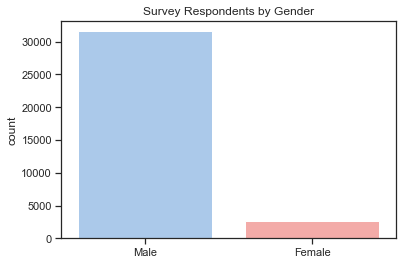

In [74]:
#Bar chart for Survey Respondents by Gender
sns.countplot(x="Gender", data=df_gender,palette=["b", "r"]).set_title('Survey Respondents by Gender');
plt.xlabel("")
plt.savefig("Gender Count.png")

In [37]:
#create function for gender percentage plots (gender column only)
def percentage_bar_chart(df,column,title,loc):
    """
Description: This function can be used to plot bar chart with percentage.

Arguments:
    df: data frame. 
    column: column in the plot. 
    title: title of the plot
    loc: control the location of text.

Returns:
    bar chart with percentage
"""
    plot =(df[column].value_counts(normalize=True).mul(100).rename('Percent').rename_axis(column).reset_index()\
    .pipe((sns.barplot, "data"), x=column, y='Percent',palette=["b", "r"]))
    plot.set_title(title)
    plot.set_ylim(0,100)
    plt.xlabel("")
    for p in plot.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() + p.get_width() / loc
        txt_y = p.get_height()
        plot.text(txt_x,txt_y,txt)
    return plot

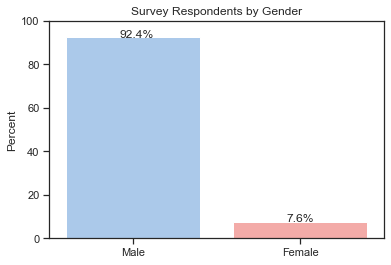

In [38]:
#Plotting percentage in gender bar chart
gender_plot = percentage_bar_chart(df_gender,'Gender','Survey Respondents by Gender',2.5)
plt.savefig("Gender Percent.png")

In [82]:
#check values in cloumn EmploymentStatus
df_gender.groupby(df_gender.Gender).EmploymentStatus.value_counts(normalize=True)

Gender  EmploymentStatus                                    
Female  Employed full-time                                      0.768462
        Employed part-time                                      0.064231
        Independent contractor, freelancer, or self-employed    0.063077
        Not employed, but looking for work                      0.059231
        Not employed, and not looking for work                  0.031154
        I prefer not to say                                     0.010769
        Retired                                                 0.003077
Male    Employed full-time                                      0.726202
        Independent contractor, freelancer, or self-employed    0.111051
        Employed part-time                                      0.057520
        Not employed, but looking for work                      0.045807
        Not employed, and not looking for work                  0.045617
        I prefer not to say                                    

In [21]:
#filter only Employed respondents (full time/part time/contractor) for comparison.
df_employed = df_gender[(df_gender.EmploymentStatus =='Employed full-time')
          |(df_gender.EmploymentStatus =='Employed part-time')
          |(df_gender.EmploymentStatus =='Independent contractor, freelancer, or self-employed')]

In [79]:
#check size of records
df_employed.Gender.value_counts()

Male      28265
Female     2329
Name: Gender, dtype: int64

In [81]:
#Statistics Summary for Salary and Expected Salary
df_employed.groupby(df_employed.Gender)[['Salary','ExpectedSalary']].describe()

Salary                                                               \
          count          mean           std  min           25%           50%   
Gender                                                                         
Female    819.0  58083.924534  38607.488222  0.0  31250.000000  52500.000000   
Male    10666.0  56996.494293  39722.918323  0.0  27262.626263  50537.634409   

                          ExpectedSalary                              \
            75%       max          count          mean           std   
Gender                                                                 
Female  83000.0  195000.0           86.0  33627.165808  28622.758773   
Male    80000.0  197000.0          825.0  35881.554098  28275.783517   

                                                                     
             min          25%           50%           75%       max  
Gender                                                               
Female  0.044046  2518.755239  34879.032258  53872.127061  100000.0  
Male    0.000000  7341.065923  36000.000000  53763.440860  150000.0

In [83]:
#Exclude missing values from Salary and expected Salary. 
#Because we have less than half value populated in data, the distribution can get highly distorted by imputing median.

salary = df_employed[['Gender','Salary','ExpectedSalary']]
salary_unpivot = salary.melt(id_vars=['Gender'], var_name='Type', value_name='Amount').dropna()
salary_unpivot.head()

,Gender,Type,Amount
1,Male,Salary,113750.0
9,Male,Salary,100000.0
11,Male,Salary,130000.0
14,Male,Salary,100764.0
16,Male,Salary,175000.0


#### Data analysis

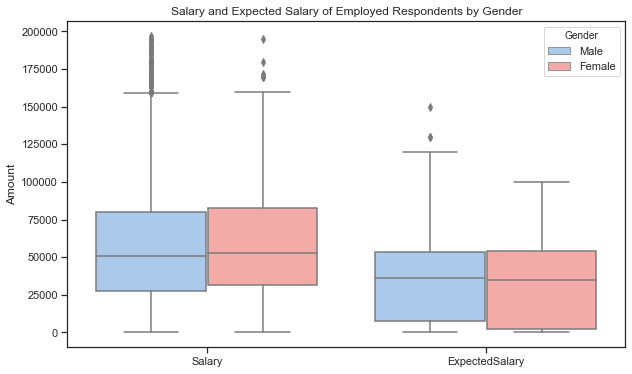

In [84]:
#Boxplot for Salary and Expected Salary 
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Amount",hue="Gender",palette=["b", "r"]
            ,data=salary_unpivot).set_title('Salary and Expected Salary of Employed Respondents by Gender');
plt.xlabel("")
plt.savefig("1.Salary_gender.png")

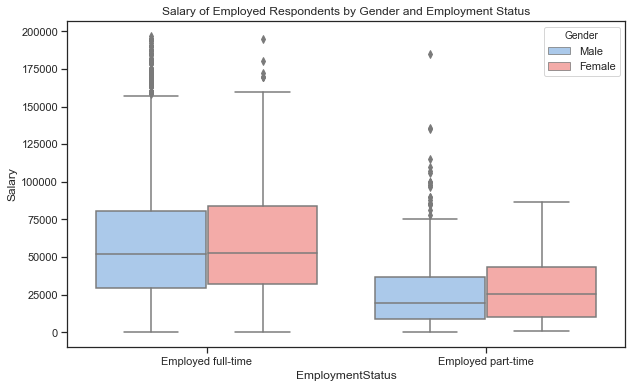

In [22]:
#Boxplot for Salary by Gender and Employment Status
df_employed_salary =df_employed.dropna(subset=['Salary']) 
plt.figure(figsize=(10,6))
sns.boxplot(x="EmploymentStatus", y="Salary",hue="Gender",palette=["b", "r"]
        ,data=df_employed_salary).set_title('Salary of Employed Respondents by Gender and Employment Status');
plt.savefig("1.1.Salary employment_gender.png")

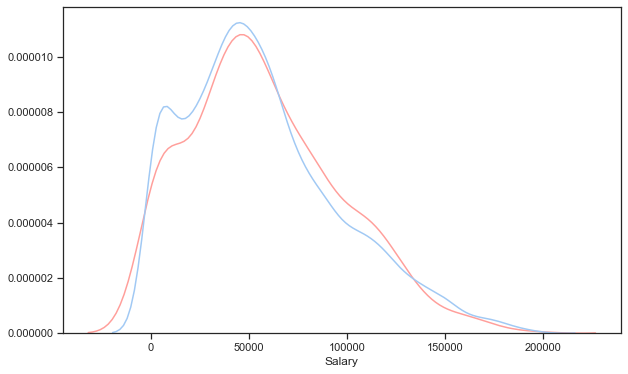

In [104]:
#distribution for Salary
plt.figure(figsize=(10,6))
sns.distplot(df_employed_salary.Salary[df_employed_salary.Gender=='Female'],hist=False,color="r")
sns.distplot(df_employed_salary.Salary[df_employed_salary.Gender=='Male'],hist=False,color="b");

#risht skewed (need a non-parametric test)

In [116]:
#check size of records
df_employed_salary.groupby(df_employed_salary.Gender).EmploymentStatus.value_counts()

Gender  EmploymentStatus  
Female  Employed full-time      788
        Employed part-time       31
Male    Employed full-time    10290
        Employed part-time      376
Name: EmploymentStatus, dtype: int64

In [10]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[df_employed_salary.Gender=='Female']
             ,df_employed_salary.Salary[df_employed_salary.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=4253695.0, pvalue=0.1061843981185307)

In [202]:
#Mann-Whitney U Test: the null hypothesis is that full time female and male programmers
#have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[(df_employed_salary.Gender=='Female')&
                                       (df_employed_salary.EmploymentStatus =='Employed full-time')]
             ,df_employed_salary.Salary[(df_employed_salary.Gender=='Male')&
                                      (df_employed_salary.EmploymentStatus =='Employed full-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=3947951.5, pvalue=0.10959462175087858)

In [201]:
#Mann-Whitney U Test: the null hypothesis is that part time female and male programmers
#have the same median of salary 
mannwhitneyu(df_employed_salary.Salary[(df_employed_salary.Gender=='Female')&
                                       (df_employed_salary.EmploymentStatus =='Employed part-time')]
             ,df_employed_salary.Salary[(df_employed_salary.Gender=='Male')&
                                      (df_employed_salary.EmploymentStatus =='Employed part-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=5320.5, pvalue=0.21029636764086723)

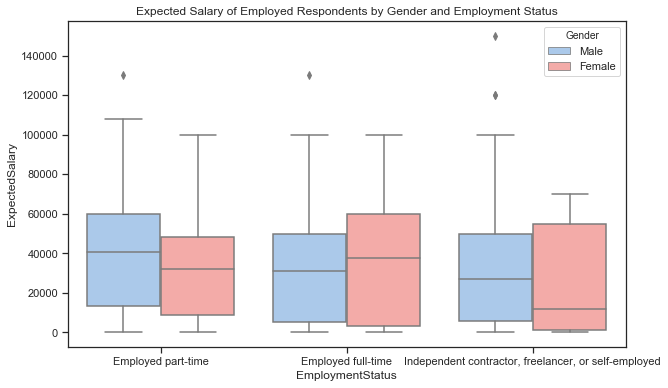

In [14]:
#Boxplot for Expected Salary by Gender and Employment Status
df_employed_exsalary =df_employed.dropna(subset=['ExpectedSalary']) 
plt.figure(figsize=(10,6))
sns.boxplot(x="EmploymentStatus", y="ExpectedSalary",hue="Gender",palette=["b", "r"]
 ,data=df_employed_exsalary).set_title('Expected Salary of Employed Respondents by Gender and Employment Status');
plt.savefig("1.2.Expected Salary employment_gender.png")

In [121]:
#check size of records
df_employed_exsalary.groupby(df_employed_exsalary.Gender).EmploymentStatus.value_counts()

Gender  EmploymentStatus                                    
Female  Employed full-time                                       37
        Employed part-time                                       37
        Independent contractor, freelancer, or self-employed     12
Male    Employed part-time                                      372
        Employed full-time                                      261
        Independent contractor, freelancer, or self-employed    192
Name: EmploymentStatus, dtype: int64

In [15]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers 
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[df_employed_exsalary.Gender=='Female']
           ,df_employed_exsalary.ExpectedSalary[df_employed_exsalary.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=33410.0, pvalue=0.18695664747132118)

In [16]:
#Mann-Whitney U Test: the null hypothesis is that full time female and male programmers
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Female')&
                                       (df_employed_exsalary.EmploymentStatus =='Employed full-time')]
             ,df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Male')&
                                      (df_employed_exsalary.EmploymentStatus =='Employed full-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=4754.0, pvalue=0.44003761948652514)

In [17]:
#Mann-Whitney U Test: the null hypothesis is that part time female and male programmers
#have the same median of expected salary 
mannwhitneyu(df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Female')&
                                       (df_employed_exsalary.EmploymentStatus =='Employed part-time')]
             ,df_employed_exsalary.ExpectedSalary[(df_employed_exsalary.Gender=='Male')&
                                      (df_employed_exsalary.EmploymentStatus =='Employed part-time')])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=6003.0, pvalue=0.1000341887789441)

#### Results evaluation
P-values are greater than 0.05, so we cannot deny the null hypothesis that the medians are equal in different employed status.

### 2. Can female programmerdevelopers get hired with a lower degree?

#### Data understanding

In [152]:
#check values in cloumn FormalEducation
df_employed.groupby(df_employed.Gender).FormalEducation.value_counts(normalize=True)

Gender  FormalEducation                                                  
Female  Bachelor's degree                                                    0.528124
        Master's degree                                                      0.279519
        Some college/university study without earning a bachelor's degree    0.099614
        Doctoral degree                                                      0.041219
        Secondary school                                                     0.033920
        Professional degree                                                  0.011593
        I prefer not to answer                                               0.004723
        I never completed any formal education                               0.000859
        Primary/elementary school                                            0.000429
Male    Bachelor's degree                                                    0.448364
        Master's degree                                           

#### Data preparation

In [46]:
#recategory FormalEducation: Master's degree and above/Bachelor's degree and Below
#we want to explore whether female programmers need a higher level of degree or not. I try to focus on only two category for T/F comparison.
remap_edu_dict = {
    "Master's degree": "Master's degree and above",
    "Doctoral degree": "Master's degree and above",
    "Professional degree": "Master's degree and above",
    "Bachelor's degree": "Bachelor's degree and Below",
    "Some college/university study without earning a bachelor's degree": "Bachelor's degree and Below",
    "Secondary school": "Bachelor's degree and Below",
    "I never completed any formal education": "Bachelor's degree and Below",
    "Primary/elementary school ": "Bachelor's degree and Below"}

df_employed.FormalEducation = df_employed.FormalEducation.map(remap_edu_dict).astype('category')

/Users/hyhy7/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [154]:
df_employed.FormalEducation.value_counts(normalize=True)

Bachelor's degree and Below    0.712006
Master's degree and above      0.287994
Name: FormalEducation, dtype: float64

In [155]:
df_employed.Gender = df_employed.Gender.astype('category')
df_employed.Gender.cat.reorder_categories(['Male', 'Female'], inplace=True)

#### Data analysis

In [51]:
#create function for percentage plots by two variables
def percentage_bar_chart_bycat(df,column,title,loc,by_column):
    """
Description: This function can be used to plot bar chart with percentage.

Arguments:
    df: data frame. 
    column: column in the plot. 
    title: title of the plot
    loc: control the location of text.
    by_column: group by this column

Returns:
    bar chart with percentage by gender
"""
    plot =(df[column].groupby(df[by_column]).value_counts(normalize=True)
        .mul(100).rename('Percent').reset_index().sort_values([column,by_column], ascending=False)
        .pipe((sns.barplot, "data"), x=column, y='Percent', hue=by_column,palette=["b", "r"]))
    plot.set_title(title)
    plot.set_ylim(0,100)
    plt.xlabel("")
    for p in plot.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() + p.get_width() / loc
        txt_y = p.get_height()
        plot.text(txt_x,txt_y,txt)
    return plot

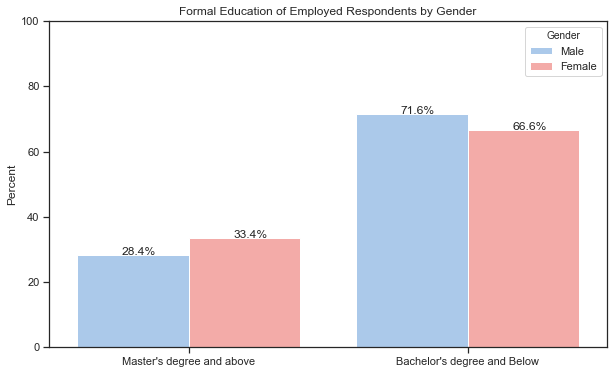

In [52]:
#Plotting percentage in Formal Education bar chart
plt.figure(figsize=(10,6))
edu_plot = percentage_bar_chart_bycat(df_employed,'FormalEducation',
                            'Formal Education of Employed Respondents by Gender',2.5,'Gender')
plt.savefig("2.FormalEducation_gender.png")

In [160]:
# Contingency table for Chi-Square test
contingency = pd.crosstab(df_employed.Gender, df_employed.FormalEducation)
contingency

FormalEducation,Bachelor's degree and Below,Master's degree and above
Gender,,
Male,19919,7907
Female,1543,774


In [169]:
#The Chi-Square test of independence: the null hypothesis is that there is no relationship 
#between Formal Education and Gender.
c, p, dof, expected = chi2_contingency(contingency)

# interpret p-value
print('p=%.3f' % (p))
if p <=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')
    
#deny the null hypothesis(pvalue< 0.05)    

p=0.000
Reject H0


#### Results evaluation
The percentage of female programmers that hired with a Master’s degree and above is higher than male programmers.
The small p-value(0.000)<0.05 shows formal education and gender are related.

### 3. Do female programmers enjoy their job as a programmer?

#### Data understanding

In [189]:
#Statistics Summary for CareerSatisfaction and JobSatisfaction
df_employed.groupby(df.Gender)[['CareerSatisfaction','JobSatisfaction']].describe()

CareerSatisfaction                                                \
                    count      mean       std  min  25%  50%  75%   max   
Gender                                                                    
Female             2144.0  7.262593  1.852614  0.0  6.0  7.0  8.0  10.0   
Male              26585.0  7.442167  1.806625  0.0  7.0  8.0  9.0  10.0   

       JobSatisfaction                                                
                 count      mean       std  min  25%  50%  75%   max  
Gender                                                                
Female          2130.0  6.936620  2.182432  0.0  6.0  7.0  8.0  10.0  
Male           26305.0  7.004372  2.123671  0.0  6.0  7.0  8.0  10.0

#### Data preparation

In [170]:
#Exclude missing values for CareerSatisfaction and JobSatisfaction.
#Still, I want to drop them to avoid bias caused by imputing. 

satisfy = df_employed[['Gender','CareerSatisfaction','JobSatisfaction']]
satisfy_unpivot = satisfy.melt(id_vars=['Gender'], var_name='Type', value_name='Amount').dropna()
satisfy_unpivot.head()

,Gender,Type,Amount
1,Male,CareerSatisfaction,8.0
2,Male,CareerSatisfaction,6.0
3,Male,CareerSatisfaction,7.0
4,Male,CareerSatisfaction,7.0
5,Male,CareerSatisfaction,6.0


#### Data analysis

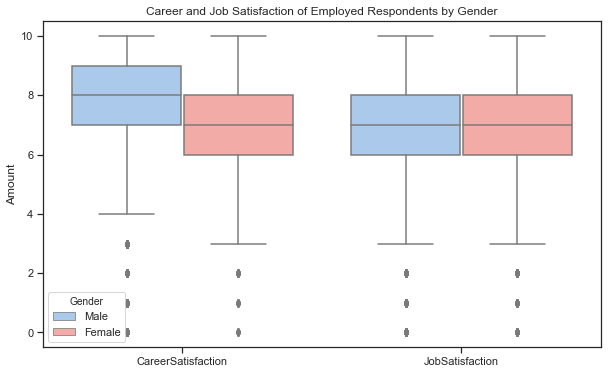

In [172]:
#Boxplot for CareerSatisfaction and JobSatisfaction
plt.figure(figsize=(10,6))
sns.boxplot(x="Type", y="Amount",hue="Gender",palette=["b", "r"]
            ,data=satisfy_unpivot).set_title('Career and Job Satisfaction of Employed Respondents by Gender');
plt.xlabel("")
plt.savefig("3.Satisfaction_gender.png")

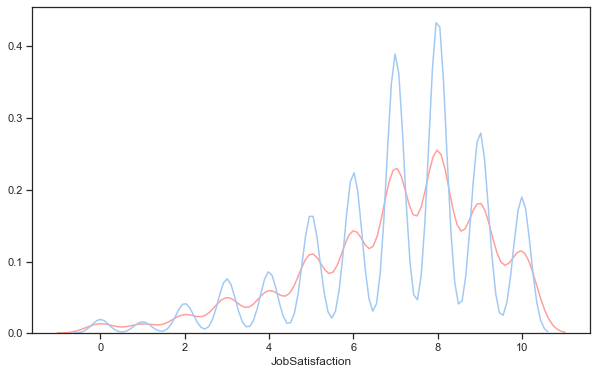

In [189]:
#distribution for JobSatisfaction
plt.figure(figsize=(10,6))
sns.distplot(df_employed.JobSatisfaction[df_employed.Gender=='Female'], hist=False,color="r")
sns.distplot(df_employed.JobSatisfaction[df_employed.Gender=='Male'], hist=False,color="b");

#Non-normal (need a non-parametric test)

In [190]:
#Mann-Whitney U Test: the null hypothesis is that female and male programmers have the same median of JobSatisfaction
mannwhitneyu(df_employed.JobSatisfaction[df_employed.Gender=='Female']
           ,df_employed.JobSatisfaction[df_employed.Gender=='Male'])

#cannot deny the null hypothesis(pvalue> 0.05)

MannwhitneyuResult(statistic=32859652.0, pvalue=0.4460895467006929)

In [197]:
#Mann-Whitney U Test: the null hypothesis is that Career Satisfaction of female programmers tend to be higher
#than Career Satisfaction of male programmers
mannwhitneyu(df_employed.CareerSatisfaction[df_employed.Gender=='Female']
            ,df_employed.CareerSatisfaction[df_employed.Gender=='Male']
            ,alternative='less')

#deny the null hypothesis(pvalue <= 0.05)

MannwhitneyuResult(statistic=31959007.0, pvalue=0.008874148305926944)

#### Results evaluation
Although female programmers have lower career satisfaction than male programmers, their job satisfaction is similar.

### 4. Do female programmers enjoy coding as a hobby?

#### Data understanding

In [224]:
#check values in cloumn ProgramHobby
df_employed.groupby(df_employed.Gender).ProgramHobby.value_counts(normalize=True)

Gender  ProgramHobby                             
Male    Yes, I program as a hobby                    0.475323
        Yes, both                                    0.289439
        No                                           0.175694
        Yes, I contribute to open source projects    0.059544
Female  Yes, I program as a hobby                    0.423358
        No                                           0.356805
        Yes, both                                    0.162301
        Yes, I contribute to open source projects    0.057535
Name: ProgramHobby, dtype: float64

#### Data preparation

In [226]:
#reorder category for plots 
df_employed.loc[:,('ProgramHobby')] = df_employed['ProgramHobby'].astype('category')

In [230]:
df_employed['ProgramHobby'].cat.reorder_categories(['Yes, I program as a hobby',
                                            'Yes, I contribute to open source projects',
                                            'Yes, both','No'],ordered=True,inplace=True)

#### Data analysis

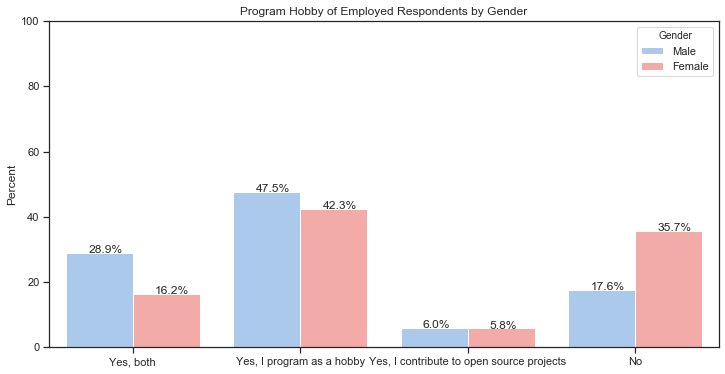

In [54]:
#Plotting percentage in ProgramHobby bar chart
plt.figure(figsize=(12,6))
hobby_plot = percentage_bar_chart_bycat(df_employed,'ProgramHobby',
                            'Program Hobby of Employed Respondents by Gender',3,'Gender')
#plt.savefig("4.ProgramHobby_gender.png")

In [235]:
# Contingency table for Chi-Square test
contingency_hobby = pd.crosstab(df_employed.Gender, df_employed.ProgramHobby)
contingency_hobby

ProgramHobby,"Yes, I program as a hobby","Yes, I contribute to open source projects","Yes, both",No
Gender,,,,
Male,13435,1683,8181,4966
Female,986,134,378,831


In [236]:
#The Chi-Square test of independence: the null hypothesis is that there is no relationship 
#between Program Hobby and Gender.
c2, p2, dof2, expected2 = chi2_contingency(contingency_hobby)

# interpret p-value
print('p=%.3f' % (p2))
if p2 <=0.05:
    print('Reject H0')
else:
    print('Fail to reject H0')
    
#deny the null hypothesis(pvalue< 0.05)    

p=0.000
Reject H0


#### Results evaluation
The small p-value(0.000)<0.05 shows program hobby and gender are related. Most female programmers tend to show less interest in coding as a hobby.